## Importing all the necessary libraries

In [33]:
# Install the below mentioned libraries before running this notebook

In [34]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

## Loading Datasets

In [35]:
df_gpu = pd.read_csv("C:/Users/Acer/OneDrive - Newcastle University/Newcastle/Cloud Computing/data/gpu.csv")

In [36]:
df_app = pd.read_csv("C:/Users/Acer/OneDrive - Newcastle University/Newcastle/Cloud Computing/data/application-checkpoints.csv")

In [37]:
df_task = pd.read_csv("C:/Users/Acer/OneDrive - Newcastle University/Newcastle/Cloud Computing/data/task-x-y.csv")

#### GPU Dataset

In [38]:
# Printing first few lines
df_gpu.head()

,timestamp,hostname,gpuSerial,gpuUUID,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc
0,2018-11-08T08:27:10.314Z,8b6a0eebc87b4cb2b0539e81075191b900001C,323217055910,GPU-1d1602dc-f615-a7c7-ab53-fb4a7a479534,131.55,48,92,53
1,2018-11-08T08:27:10.192Z,d8241877cd994572b46c861e5d144c85000000,323617020295,GPU-04a2dea7-f4f1-12d0-b94d-996446746e6f,117.03,40,92,48
2,2018-11-08T08:27:10.842Z,db871cd77a544e13bc791a64a0c8ed50000006,323217056562,GPU-f4597939-a0b4-e78a-2436-12dbab9a350f,121.64,45,91,44
3,2018-11-08T08:27:10.424Z,b9a1fa7ae2f74eb68f25f607980f97d7000010,325217085931,GPU-ad773c69-c386-a4be-b214-1ea4fc6045df,50.23,38,90,43
4,2018-11-08T08:27:10.937Z,db871cd77a544e13bc791a64a0c8ed50000003,323217056464,GPU-2d4eed64-4ca8-f12c-24bc-28f036493ea2,141.82,41,90,47


In [39]:
# Checking diemnsions of data 
df_gpu.shape

(1543681, 8)

In [40]:
# Finding duplicates acoss all columns
duplicateRows = df_gpu[df_gpu.duplicated()]

In [41]:
# Dropping duplicate rows
df_gpu = df_gpu.drop_duplicates(keep=False)
df_gpu.shape

(1543663, 8)

In [42]:
duplicateRows = df_gpu[df_gpu.duplicated(['gpuUUID'])]

In [43]:
df_gpu_test = df_gpu.drop_duplicates(subset=['gpuUUID'])
df_gpu_test.shape

(1024, 8)

#### Application Checkpoint Dataset

In [44]:
# Printing first few lines
df_app.head()

,timestamp,hostname,eventName,eventType,jobId,taskId
0,2018-11-08T07:41:55.921Z,0d56a730076643d585f77e00d2d8521a00000N,Tiling,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,b47f0263-ba1c-48a7-8d29-4bf021b72043
1,2018-11-08T07:42:29.842Z,0d56a730076643d585f77e00d2d8521a00000N,Saving Config,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d
2,2018-11-08T07:42:29.845Z,0d56a730076643d585f77e00d2d8521a00000N,Saving Config,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d
3,2018-11-08T07:42:29.845Z,0d56a730076643d585f77e00d2d8521a00000N,Render,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d
4,2018-11-08T07:43:13.957Z,0d56a730076643d585f77e00d2d8521a00000N,TotalRender,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d


In [45]:
# Checking diemnsions of data 
df_app.shape

(660400, 6)

#### Test Dataset

In [46]:
# Printing first few lines
df_task.head()

,taskId,jobId,x,y,level
0,00004e77-304c-4fbd-88a1-1346ef947567,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,116,178,12
1,0002afb5-d05e-4da9-bd53-7b6dc19ea6d4,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,142,190,12
2,0003c380-4db9-49fb-8e1c-6f8ae466ad85,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,142,86,12
3,000993b6-fc88-489d-a4ca-0a44fd800bd3,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,235,11,12
4,000b158b-0ba3-4dca-bf5b-1b3bd5c28207,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,171,53,12


In [47]:
# Checking diemnsions of data
df_task.shape

(65793, 5)

# Exploratory Data Analysis

In [48]:
TIMESTAMP_FORMAT = '%Y-%m-%dT%H:%M:%S.%fZ'
def timestamp_conv(df):
    """
    Converts a timestamp to datetime
    
    Parameters
    ----------
    df
        dataframe to convert to datetime
    ----------
    float
        converted timestamp
    """
    
    df = df.apply(lambda x: (datetime.strptime(x, TIMESTAMP_FORMAT)))    
    return(df)  

#### Merging Functions

In [49]:
def merge_check_task(df_checkpoints, df_tasks):


    # Merging application check point and task (left join) taskId and jobId

    df_check_task = df_checkpoints.merge(df_tasks,
                                     on=['taskId', 'jobId'], how='left')
    return (df_check_task)
merge_1 = merge_check_task(df_app, df_task)

In [50]:
# Converting timestamp for gpu data

df_gpu['timestamp'] = timestamp_conv(df_gpu['timestamp'])
df_gpu

,timestamp,hostname,gpuSerial,gpuUUID,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc
0,2018-11-08 08:27:10.314,8b6a0eebc87b4cb2b0539e81075191b900001C,323217055910,GPU-1d1602dc-f615-a7c7-ab53-fb4a7a479534,131.55,48,92,53
1,2018-11-08 08:27:10.192,d8241877cd994572b46c861e5d144c85000000,323617020295,GPU-04a2dea7-f4f1-12d0-b94d-996446746e6f,117.03,40,92,48
2,2018-11-08 08:27:10.842,db871cd77a544e13bc791a64a0c8ed50000006,323217056562,GPU-f4597939-a0b4-e78a-2436-12dbab9a350f,121.64,45,91,44
3,2018-11-08 08:27:10.424,b9a1fa7ae2f74eb68f25f607980f97d7000010,325217085931,GPU-ad773c69-c386-a4be-b214-1ea4fc6045df,50.23,38,90,43
4,2018-11-08 08:27:10.937,db871cd77a544e13bc791a64a0c8ed50000003,323217056464,GPU-2d4eed64-4ca8-f12c-24bc-28f036493ea2,141.82,41,90,47
...,...,...,...,...,...,...,...,...
1543676,2018-11-08 08:31:18.873,0d56a730076643d585f77e00d2d8521a00000N,325217086221,GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f,26.99,30,0,0
1543677,2018-11-08 08:31:24.933,0d56a730076643d585f77e00d2d8521a00000N,325217086221,GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f,26.90,29,0,0
1543678,2018-11-08 08:31:32.998,0d56a730076643d585f77e00d2d8521a00000N,325217086221,GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f,26.88,29,0,0
1543679,2018-11-08 08:31:39.057,0d56a730076643d585f77e00d2d8521a00000N,325217086221,GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f,26.89,29,0,0


In [51]:
# Converting timestamp for merged data (appl. check and task)
merge_1['timestamp'] = timestamp_conv(merge_1['timestamp'])
merge_1

,timestamp,hostname,eventName,eventType,jobId,taskId,x,y,level
0,2018-11-08 07:41:55.921,0d56a730076643d585f77e00d2d8521a00000N,Tiling,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,b47f0263-ba1c-48a7-8d29-4bf021b72043,2,10,12
1,2018-11-08 07:42:29.842,0d56a730076643d585f77e00d2d8521a00000N,Saving Config,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d,238,4,12
2,2018-11-08 07:42:29.845,0d56a730076643d585f77e00d2d8521a00000N,Saving Config,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d,238,4,12
3,2018-11-08 07:42:29.845,0d56a730076643d585f77e00d2d8521a00000N,Render,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d,238,4,12
4,2018-11-08 07:43:13.957,0d56a730076643d585f77e00d2d8521a00000N,TotalRender,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d,238,4,12
...,...,...,...,...,...,...,...,...,...
660395,2018-11-08 08:30:10.296,0745914f4de046078517041d70b22fe700000I,Tiling,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,8261c0ff-03d6-48b3-a50f-da41cb3291fd,33,217,12
660396,2018-11-08 08:30:10.325,0745914f4de046078517041d70b22fe700000I,Uploading,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,8261c0ff-03d6-48b3-a50f-da41cb3291fd,33,217,12
660397,2018-11-08 08:30:14.081,a77ef58b13ad4c01b769dac8409af3f800000H,Tiling,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,ce97e3e9-494a-43a7-aa85-edd2db4cf099,85,103,12
660398,2018-11-08 08:30:14.127,a77ef58b13ad4c01b769dac8409af3f800000H,TotalRender,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,ce97e3e9-494a-43a7-aa85-edd2db4cf099,85,103,12


In [52]:
def final_merge_gpu(gpu_data,  merge_1):


    # Merging gpu and application checkpoints data (inner join) based on timestamp and hostname

    merge_gpu_app = gpu_data.merge(merge_1,on=['timestamp'], how='inner')
    return (merge_gpu_app)
df_final = final_merge_gpu(df_gpu, merge_1)


In [79]:
df_final.shape
df_final

,timestamp,hostname_x,gpuSerial,gpuUUID,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc,hostname_y,eventName,eventType,jobId,taskId,x,y,level
0,2018-11-08 08:27:10.875,4a79b6d2616049edbf06c6aa58ab426a000008,325017019905,GPU-0e6e345c-ba46-d455-b6a1-ba8a2cfc62c0,77.87,36,90,40,265232c5f6814768aeefa66a7bec6ff6000010,Render,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,0fea60cb-e10d-4879-a50d-9c20926f50af,32,174,12
1,2018-11-08 08:27:10.875,4a79b6d2616049edbf06c6aa58ab426a000008,325017019905,GPU-0e6e345c-ba46-d455-b6a1-ba8a2cfc62c0,77.87,36,90,40,265232c5f6814768aeefa66a7bec6ff6000010,Uploading,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,0fea60cb-e10d-4879-a50d-9c20926f50af,32,174,12
2,2018-11-08 08:27:10.624,b9a1fa7ae2f74eb68f25f607980f97d700000B,324917052053,GPU-cd9e7193-8237-4e36-aa41-f5e30f10044a,88.47,40,91,48,04dc4e9647154250beeee51b866b0715000014,Saving Config,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,46496dde-fa77-4395-8cda-8705561b32dc,167,224,12
3,2018-11-08 08:27:10.624,b9a1fa7ae2f74eb68f25f607980f97d700000B,324917052053,GPU-cd9e7193-8237-4e36-aa41-f5e30f10044a,88.47,40,91,48,04dc4e9647154250beeee51b866b0715000014,Render,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,46496dde-fa77-4395-8cda-8705561b32dc,167,224,12
4,2018-11-08 08:27:10.359,4c72fae95b9147189a0559269a6953ff00000X,325117063055,GPU-21dc01c9-a613-e5ed-d2f9-e4320a7517e3,146.32,43,93,52,6139a35676de44d6b61ec247f0ed8657000009,Render,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,723b6fff-9d27-4b67-8b9d-ae40a501b1bc,248,255,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337677,2018-11-08 08:24:23.967,0d56a730076643d585f77e00d2d8521a00000N,325217086221,GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f,124.28,39,89,45,6139a35676de44d6b61ec247f0ed8657000017,Saving Config,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,8784602b-8752-46c9-8be3-dce695cad495,98,153,12
337678,2018-11-08 08:27:49.025,0d56a730076643d585f77e00d2d8521a00000N,325217086221,GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f,43.15,38,0,0,5903af3699134795af7eafc605ae5fc700000X,Render,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,83940c2d-f3e3-45c3-a58c-9e8d5277bc1c,161,181,12
337679,2018-11-08 08:27:49.025,0d56a730076643d585f77e00d2d8521a00000N,325217086221,GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f,43.15,38,0,0,5903af3699134795af7eafc605ae5fc700000X,Uploading,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,83940c2d-f3e3-45c3-a58c-9e8d5277bc1c,161,181,12
337680,2018-11-08 08:29:58.159,0d56a730076643d585f77e00d2d8521a00000N,325217086221,GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f,27.27,32,0,0,4a79b6d2616049edbf06c6aa58ab426a00000X,Render,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,2c429cac-7be1-4c04-be01-50bd48bedcfe,55,251,12


In [54]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 337682 entries, 0 to 337681
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   timestamp       337682 non-null  datetime64[ns]
 1   hostname_x      337682 non-null  object        
 2   gpuSerial       337682 non-null  int64         
 3   gpuUUID         337682 non-null  object        
 4   powerDrawWatt   337682 non-null  float64       
 5   gpuTempC        337682 non-null  int64         
 6   gpuUtilPerc     337682 non-null  int64         
 7   gpuMemUtilPerc  337682 non-null  int64         
 8   hostname_y      337682 non-null  object        
 9   eventName       337682 non-null  object        
 10  eventType       337682 non-null  object        
 11  jobId           337682 non-null  object        
 12  taskId          337682 non-null  object        
 13  x               337682 non-null  int64         
 14  y               337682 non-null  int

In [55]:
# Record start and stop times in seperate columns

df_start = df_final[
df_final['eventType'] == 'START']
df_stop = df_final[
df_final['eventType'] == 'STOP']

df_start.rename(
        index=str, columns={"timestamp": "start_time"}, inplace = True)
df_stop.rename(
        index=str, columns={"timestamp": "stop_time"}, inplace = True)

df_stop.drop('eventType', axis = 1, inplace = True)
df_start.drop('eventType', axis = 1, inplace = True)
   
# Make each field record start and stop combined
   
df = pd.merge( df_start, df_stop, 
            on=['eventName', 'x', 'y', 'level'])
df

C:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,start_time,hostname_x_x,gpuSerial_x,gpuUUID_x,powerDrawWatt_x,gpuTempC_x,gpuUtilPerc_x,gpuMemUtilPerc_x,hostname_y_x,eventName,...,hostname_x_y,gpuSerial_y,gpuUUID_y,powerDrawWatt_y,gpuTempC_y,gpuUtilPerc_y,gpuMemUtilPerc_y,hostname_y_y,jobId_y,taskId_y
0,2018-11-08 08:27:10.875,4a79b6d2616049edbf06c6aa58ab426a000008,325017019905,GPU-0e6e345c-ba46-d455-b6a1-ba8a2cfc62c0,77.87,36,90,40,265232c5f6814768aeefa66a7bec6ff6000010,Uploading,...,95b4ae6d890e4c46986d91d7ac4bf08200000T,324917052614,GPU-bc05182a-0194-740f-827e-851d9ae28136,40.97,35,0,0,265232c5f6814768aeefa66a7bec6ff6000010,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,0fea60cb-e10d-4879-a50d-9c20926f50af
1,2018-11-08 08:27:10.624,b9a1fa7ae2f74eb68f25f607980f97d700000B,324917052053,GPU-cd9e7193-8237-4e36-aa41-f5e30f10044a,88.47,40,91,48,04dc4e9647154250beeee51b866b0715000014,Render,...,4c72fae95b9147189a0559269a6953ff00000P,325117172543,GPU-159afbfa-9b2e-ec8c-aff4-a920bd54b8ba,43.79,37,0,0,04dc4e9647154250beeee51b866b0715000014,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,46496dde-fa77-4395-8cda-8705561b32dc
2,2018-11-08 08:27:10.359,4c72fae95b9147189a0559269a6953ff00000X,325117063055,GPU-21dc01c9-a613-e5ed-d2f9-e4320a7517e3,146.32,43,93,52,6139a35676de44d6b61ec247f0ed8657000009,Uploading,...,04dc4e9647154250beeee51b866b071500001C,323617020155,GPU-51b7ec74-a5ac-06b7-1fd0-9c11ce579ffc,28.05,39,0,0,6139a35676de44d6b61ec247f0ed8657000009,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,723b6fff-9d27-4b67-8b9d-ae40a501b1bc
3,2018-11-08 08:27:10.359,4c72fae95b9147189a0559269a6953ff00000X,325117063055,GPU-21dc01c9-a613-e5ed-d2f9-e4320a7517e3,146.32,43,93,52,6139a35676de44d6b61ec247f0ed8657000009,Uploading,...,b9a1fa7ae2f74eb68f25f607980f97d7000012,325117172395,GPU-50f23433-71f3-6f16-3c86-0de884dc7493,44.21,37,0,0,6139a35676de44d6b61ec247f0ed8657000009,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,723b6fff-9d27-4b67-8b9d-ae40a501b1bc
4,2018-11-08 08:27:10.678,83ea61ac1ef54f27a3bf7bd0f41ecaa700000T,323617021291,GPU-fa23937e-9287-a4f8-f648-3787bfa31054,71.59,41,89,42,6139a35676de44d6b61ec247f0ed865700001D,Render,...,83ea61ac1ef54f27a3bf7bd0f41ecaa700000H,323617043161,GPU-82ba6a59-510a-9995-4167-0945785066b3,27.05,35,0,0,6139a35676de44d6b61ec247f0ed865700001D,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,7e65b2da-9580-4475-8d39-7938a2975fb0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86622,2018-11-08 08:05:49.714,0d56a730076643d585f77e00d2d8521a00000N,325217086221,GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f,97.68,41,91,57,04dc4e9647154250beeee51b866b0715000014,TotalRender,...,a77ef58b13ad4c01b769dac8409af3f800000L,323617020277,GPU-636b97cd-9ff5-cbf0-9b18-e462e3b8a6fb,88.59,39,94,47,04dc4e9647154250beeee51b866b0715000014,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,8b8faa57-c9ec-4eb0-99b9-9bd6ef77e074
86623,2018-11-08 08:05:49.714,0d56a730076643d585f77e00d2d8521a00000N,325217086221,GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f,97.68,41,91,57,6139a35676de44d6b61ec247f0ed865700001A,Render,...,0d56a730076643d585f77e00d2d8521a00001D,324917053014,GPU-fd95a940-581a-15ac-2e82-96c00f9e1a9a,122.93,47,92,45,6139a35676de44d6b61ec247f0ed865700001A,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,fa0834da-3d07-417a-b5ce-a84345f84f91
86624,2018-11-08 08:18:00.161,0d56a730076643d585f77e00d2d8521a00000N,325217086221,GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f,70.32,37,81,29,265232c5f6814768aeefa66a7bec6ff600000U,Tiling,...,0745914f4de046078517041d70b22fe7000003,325217086360,GPU-13ba9276-da7a-8225-3302-c800e4c8ff07,96.21,39,92,43,265232c5f6814768aeefa66a7bec6ff600000U,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,0063a2c3-6bf9-4023-b808-cfc11d3dbc1d
86625,2018-11-08 08:24:23.967,0d56a730076643d585f77e00d2d8521a00000N,325217086221,GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f,124.28,39,89,45,6139a35676de44d6b61ec247f0ed8657000017,Saving Config,...,35bd84d72aca403b8129a7d652cc2750000004,323617043182,GPU-78dfd50b-ffc4-bc85-3ab3-ac3a460d98bb,114.68,44,94,57,6139a

In [68]:
# group by event name (except total) to find execution times
event_deltas = df[df['eventName'] != 'TotalRender'].groupby(
['eventName']).apply(lambda x: x.stop_time - x.start_time)
# # sum execution times
# event_deltas.groupby(['eventName']).sum().plot(kind = 'bar').unstack()
# plt.ylabel('Time')
# plt.title('Event Summed Execution Time By Event Name')
# plt.rcParams['figure.figsize'] = [15, 8]


In [59]:
event_deltas

eventName       
Render     1       0 days 00:00:46.741000
           4       0 days 00:00:47.483000
           5       0 days 00:00:47.483000
           6       0 days 00:00:47.483000
           7       0 days 00:00:47.483000
                            ...          
Uploading  86609   0 days 00:00:01.161000
           86610   0 days 00:00:01.265000
           86611   0 days 00:00:01.265000
           86619   0 days 00:00:00.825000
           86620   0 days 00:00:00.825000
Length: 69151, dtype: timedelta64[ns]

In [ ]:
# # Plotting host name frequency
# merge_1['hostname'].value_counts().plot(kind = 'hist')
# plt.xlabel('Number of Tasks Assigned')
# plt.title('Tasks Assigned by GPU')
# plt.rcParams['figure.figsize'] = [10, 6]

#  # Saving figure
# #plt.savefig('Images/tasks.png')
# plt.show()

In [73]:
x = df_gpu.gpuTempC
y = df_gpu.powerDrawWatt

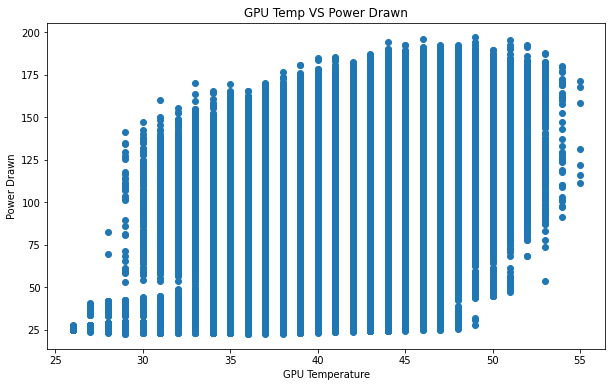

In [74]:
# Plotting scatter plot
plt.scatter(x,y)
plt.xlabel('GPU Temperature')
plt.ylabel('Power Drawn')
plt.title('GPU Temp VS Power Drawn')

# Defining chart size
plt.rcParams['figure.figsize'] = [10, 6]

# Saving Image
# plt.savefig('Images/temp-power.png')
plt.show()

In [82]:
x = df_gpu.gpuMemUtilPerc
y = df_gpu.gpuUtilPerc

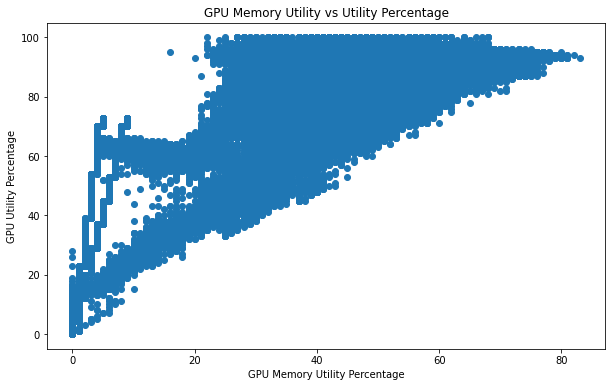

In [83]:
# Plotting scatter plot
plt.scatter(x,y)
plt.xlabel('GPU Memory Utility Percentage')
plt.ylabel('GPU Utility Percentage')
plt.title('GPU Memory Utility vs Utility Percentage')

# Defining chart size
plt.rcParams['figure.figsize'] = [10, 6]

# Saving Image
# plt.savefig('Images/mem-utility.png')
plt.show()

In [77]:
# Summary of the data
df_gpu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1543663 entries, 0 to 1543680
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   timestamp       1543663 non-null  datetime64[ns]
 1   hostname        1543663 non-null  object        
 2   gpuSerial       1543663 non-null  int64         
 3   gpuUUID         1543663 non-null  object        
 4   powerDrawWatt   1543663 non-null  float64       
 5   gpuTempC        1543663 non-null  int64         
 6   gpuUtilPerc     1543663 non-null  int64         
 7   gpuMemUtilPerc  1543663 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 106.0+ MB


In [78]:
# Statistical Sumary of the data
df_gpu.describe()

,gpuSerial,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc
count,1.543663e+06,1.543663e+06,1.543663e+06,1.543663e+06,1.543663e+06
mean,3.239836e+11,8.919851e+01,4.007562e+01,6.305822e+01,3.341360e+01
std,1.228836e+09,3.975741e+01,3.800256e+00,4.144813e+01,2.300106e+01
min,3.201181e+11,2.255000e+01,2.600000e+01,0.000000e+00,0.000000e+00
25%,3.236170e+11,4.499000e+01,3.800000e+01,0.000000e+00,0.000000e+00
50%,3.236170e+11,9.659000e+01,4.000000e+01,8.900000e+01,4.300000e+01
75%,3.250170e+11,1.213400e+02,4.200000e+01,9.200000e+01,5.100000e+01
max,3.252171e+11,1.970100e+02,5.500000e+01,1.000000e+02,8.300000e+01


In [84]:
# Seperating numerical columns needed to find correlation
gpu_corr = df_gpu.iloc[:,4:8]

# Finding correlation
gpu_corr.corr()

,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc
powerDrawWatt,1.000000,0.537190,0.862673,0.870746
gpuTempC,0.537190,1.000000,0.505906,0.492783
gpuUtilPerc,0.862673,0.505906,1.000000,0.966571
gpuMemUtilPerc,0.870746,0.492783,0.966571,1.000000


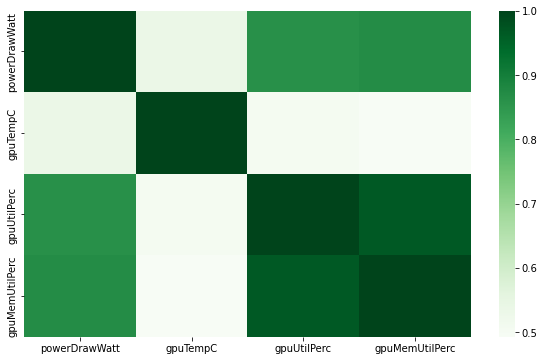

In [85]:
# Plotting Heat Map
plt.figure(figsize=(10, 6))
sns.heatmap(gpu_corr.corr(),cmap='Greens',annot=False)

# Saving Image
plt.savefig('Images/Heat-map.png')
plt.show()

In [90]:
# Displaying total iterations based on event name
df_final['eventName'].value_counts()

TotalRender      67756
Saving Config    67682
Uploading        67642
Render           67328
Tiling           67274
Name: eventName, dtype: int64

In [89]:
# Displaying total iterations based on event type
df_final['eventType'].value_counts()

START    169386
STOP     168296
Name: eventType, dtype: int64

In [92]:
# Displaying counts based on level
df_final['level'].value_counts()

12    336345
8       1331
4          6
Name: level, dtype: int64

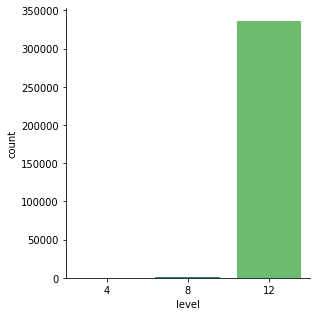

In [98]:
sns.catplot(x='level',kind='count', data=df_final, height=4.5, palette='viridis')

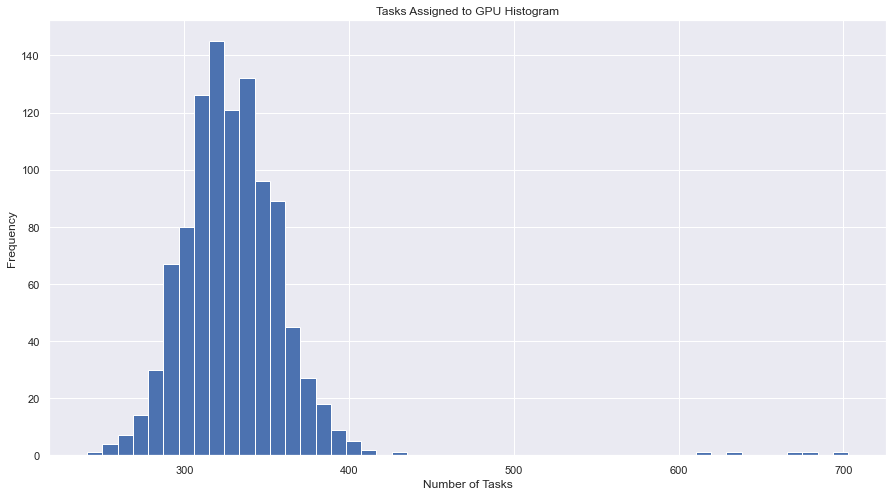

In [130]:
# g1 = sns.catplot(x='gpuSerial',kind='count', data=df_final, height=4.5, palette='viridis')

# g1.set(xticklabels=[])  # remove the tick labels
# g1.set(title='Freq of tasks assigned to GPUs')  # add a title
# g1.set(xlabel=None)  # remove the axis label

# plt.show()


df_final['gpuUUID'].value_counts().plot(kind = 'hist', bins=50)
plt.xlabel('Number of Tasks')
plt.title('Tasks Assigned to GPU Histogram')
plt.rcParams['figure.figsize'] = [15, 8]
# plt.savefig('Images/tasks-histo.png') # save figure
plt.show()

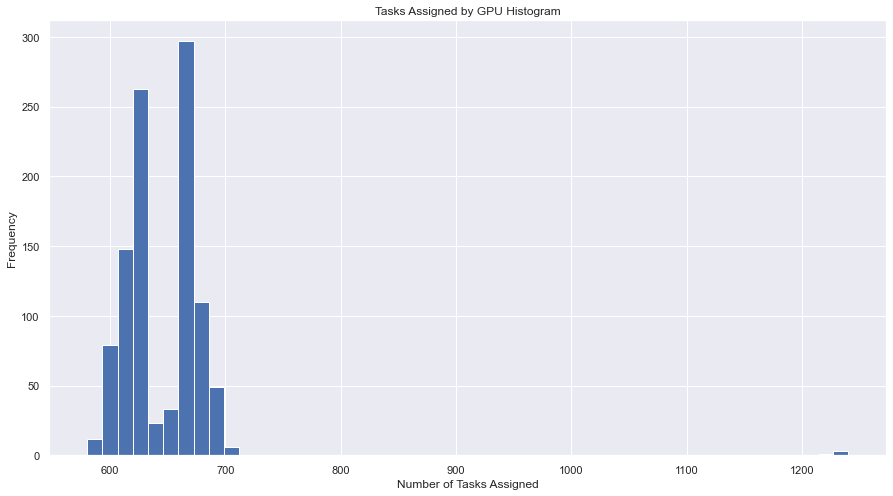

In [127]:
merge_1['hostname'].value_counts().plot(kind = 'hist', bins=50)
plt.xlabel('Number of Tasks Assigned')
plt.title('Tasks Assigned by GPU Histogram')
plt.rcParams['figure.figsize'] = [15, 8]
# plt.savefig('/tasks-histo.png') # save figure
plt.show()

Text(0.5, 1.0, 'Task Workload')

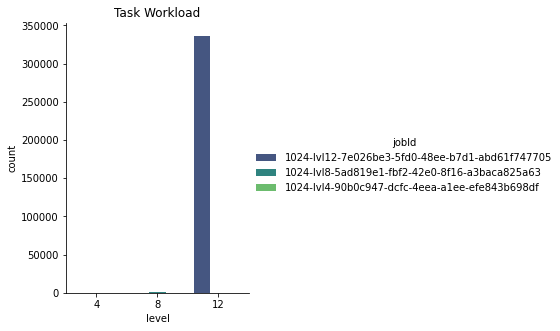

In [97]:
sns.catplot(x='level', kind='count', data=df_final, hue = "jobId", height=4.5, palette='viridis')
plt.title("Task Workload")

## Plotting pair subplots to obtain relationship between variables. 

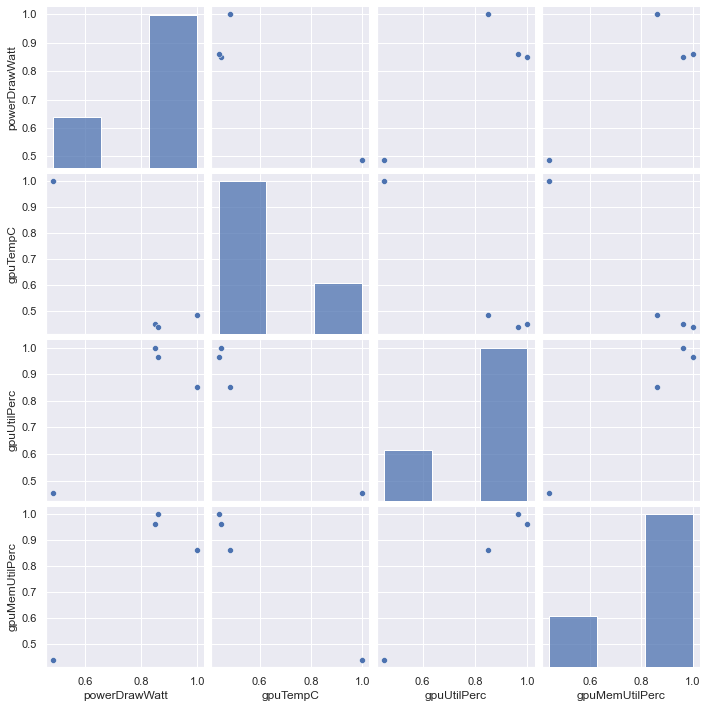

In [122]:

matrix_corr = df_final.iloc[:,4:8].corr()
sns.pairplot(matrix_corr)

## Plotting Histogram to visualize the power consumption range

C:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


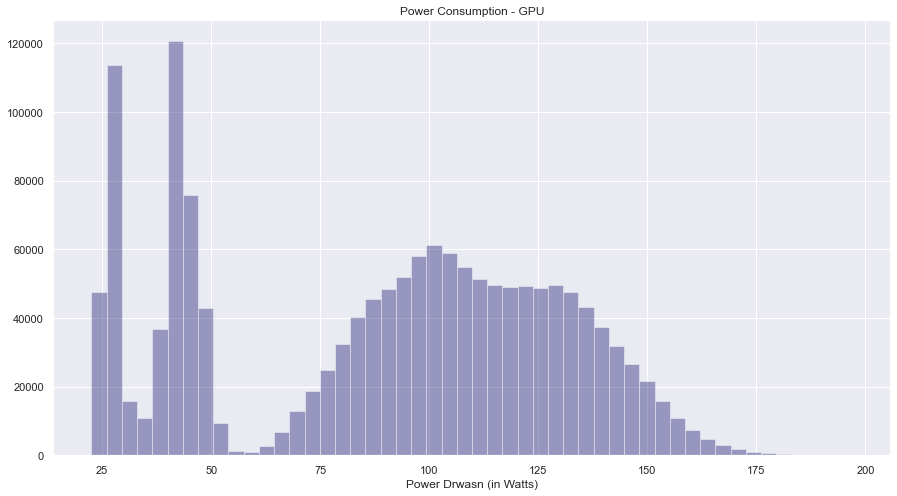

In [101]:
# Setting size and plotting chart
plt.figure(figsize=(15,8)) 
sns.set()
sns.distplot(df_gpu['powerDrawWatt'], kde = False, color = 'midnightblue', label = "Age")

# Adding Labels and Title
plt.title("Power Consumption - GPU")
plt.xlabel('Power Drwasn (in Watts)')

# Saving Image
plt.savefig('Images/Powerconsumption.png')

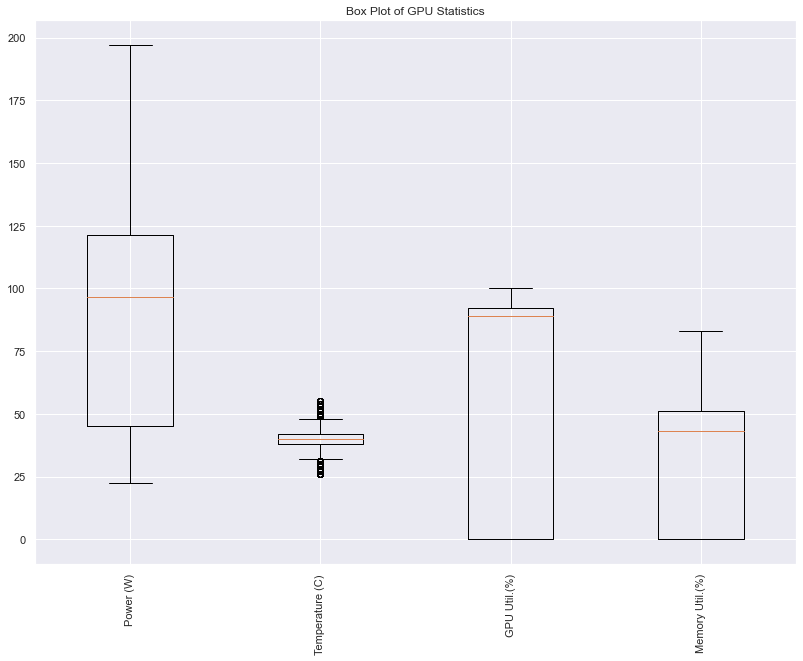

In [103]:
# List of gpu statical labels mentioned in the dataset
gpu_stats = ['Power (W)','Temperature (C)','GPU Util.(%)','Memory Util.(%)']

plt.subplot(1, 2, 1)
plt.boxplot([df_gpu['powerDrawWatt'], df_gpu['gpuTempC'],
df_gpu['gpuUtilPerc'], df_gpu['gpuMemUtilPerc']])

# Add labels
plt.xticks([i+1 for i, x in enumerate(gpu_stats)],
gpu_stats, rotation='vertical')

# Plot Title
plt.title('Box Plot of GPU Statistics')
plt.rcParams['figure.figsize'] = [30, 10]

# Saving Image
# plt.savefig('Images/Box-plot.png')
plt.show()


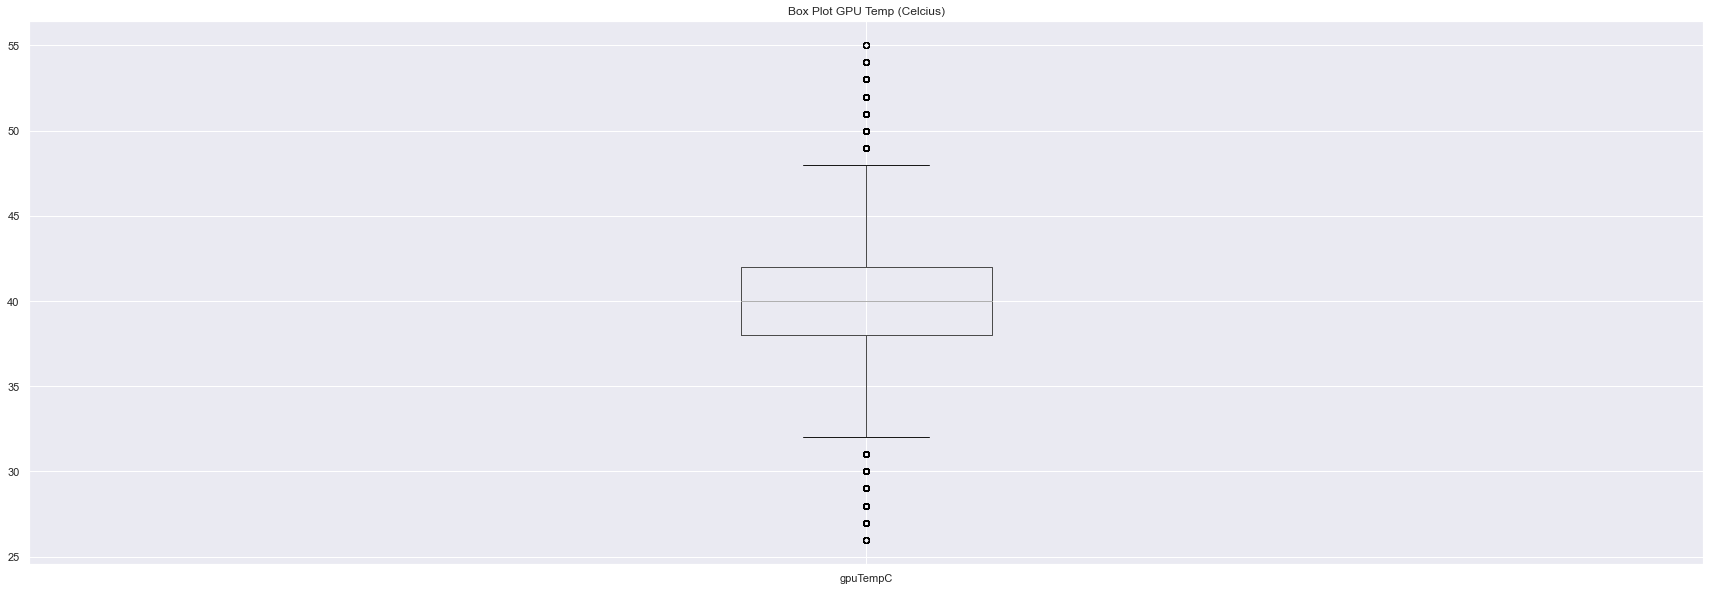

In [104]:
# Plotting scatter plot
#fig = plt.figure(figsize = (10,7))
df_gpu.boxplot(column = ["gpuTempC"])
plt.title('Box Plot GPU Temp (Celcius)')

# Defining chart size
plt.rcParams['figure.figsize'] = [10, 6]

# Saving Image
# plt.savefig('Images/Box-plot_gpu_temp.png')
plt.show()

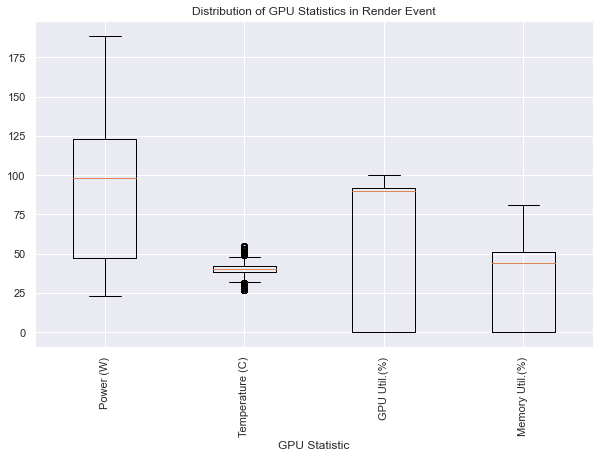

In [107]:
# group by statistic
plt.boxplot(
[df_final[df_final['eventName'] == 'Render']['powerDrawWatt'],
df_final[df_final['eventName'] == 'Render']['gpuTempC'],
df_final[df_final['eventName'] == 'Render']['gpuUtilPerc'],
df_final[df_final['eventName'] == 'Render']['gpuMemUtilPerc']])
# setup labels and titles
plt.title('Distribution of GPU Statistics in Render Event')
plt.xlabel('GPU Statistic')
plt.xticks([i+1 for i, _ in enumerate(gpu_stats)],
gpu_stats, rotation='vertical')
# draw plot
plt.rcParams['figure.figsize'] = [8, 6]
plt.show()

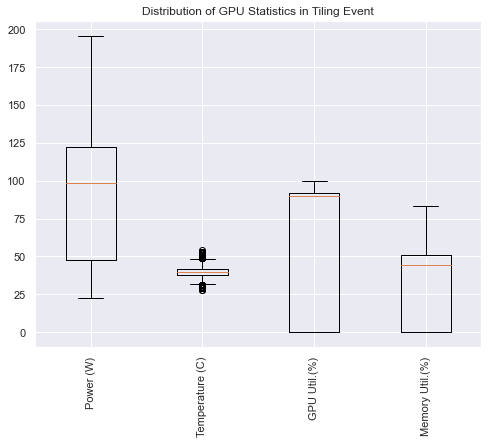

In [108]:
# group by statistic
plt.boxplot(
[df_final[df_final['eventName'] == 'Tiling']['powerDrawWatt'],
df_final[df_final['eventName'] == 'Tiling']['gpuTempC'],
df_final[df_final['eventName'] == 'Tiling']['gpuUtilPerc'],
df_final[df_final['eventName'] == 'Tiling']['gpuMemUtilPerc']])
# setup labels and titles
9
plt.title('Distribution of GPU Statistics in Tiling Event')
plt.xticks([i+1 for i, _ in enumerate(gpu_stats)],
gpu_stats, rotation='vertical')
# draw plot
plt.rcParams['figure.figsize'] = [8, 6]
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

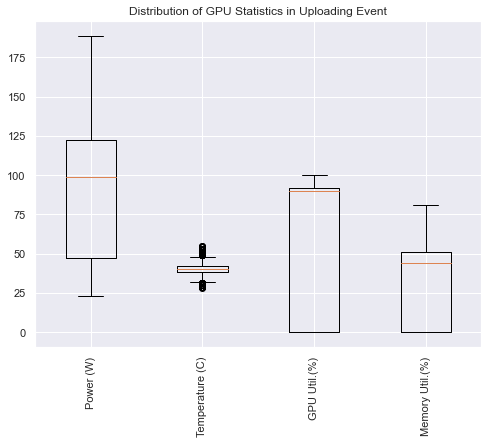

In [109]:
# group by statistic
10
plt.boxplot(
[df_final[df_final['eventName'] == 'Uploading']['powerDrawWatt'],
df_final[df_final['eventName'] == 'Uploading']['gpuTempC'],
df_final[df_final['eventName'] == 'Uploading']['gpuUtilPerc'],
df_final[df_final['eventName'] == 'Uploading']['gpuMemUtilPerc']])
# setup labels and titles
plt.title('Distribution of GPU Statistics in Uploading Event')
plt.xticks([i+1 for i, _ in enumerate(gpu_stats)],
gpu_stats, rotation='vertical')
# draw plot
plt.rcParams['figure.figsize'] = [8, 6]
plt.show